In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv',decimal=',')
dfall=df.copy()
df.dropna(axis=0,how='any',inplace=True)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616,7.783,0.775,52.625,0.763,-0.051,0.844,0.658,0.212
2195,Zimbabwe,2019,2.694,7.698,0.759,53.100,0.632,-0.047,0.831,0.658,0.235
2196,Zimbabwe,2020,3.160,7.596,0.717,53.575,0.643,0.006,0.789,0.661,0.346
2197,Zimbabwe,2021,3.155,7.657,0.685,54.050,0.668,-0.076,0.757,0.610,0.242


In [58]:
def nuage_pt_tous_pays(df):
    L=df.columns.to_list()
    X=df[L[0]].to_list()
    Y=df[L[1]].to_list()
    plt.plot(X,Y, 'ob')
    plt.xlabel(L[0])
    plt.ylabel(L[1])
    coef=np.polyfit(X,Y, 1)
    def droite(t):
        return(coef[1]+coef[0]*t)
    L=[droite(t)for t in X]
    plt.plot(X,L, c='r')
    plt.show()

def courbe_un_pays(df):
    L=df.columns.to_list()
    x=df.index.to_list()
    fig, axs = plt.subplots(len(L), 1)
    for k in range (len(L)):
        X=df[L[k]].to_list()
        axs[k].plot(x, X)
        plt.ylabel(L[k])
    plt.xlabel('year')
    plt.show()

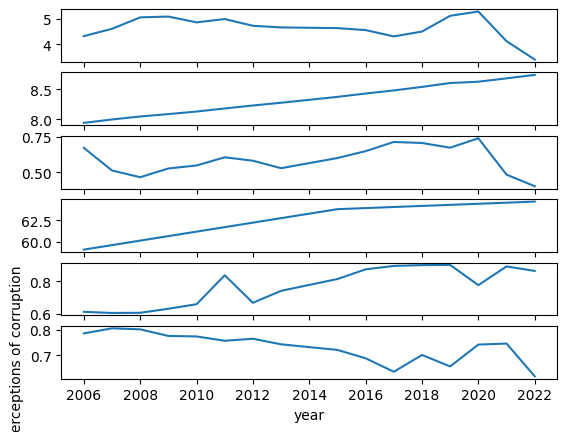

In [59]:
#évolution des paramètres au bangladesh
dfbangladesh = df[df['Country name'] == 'Bangladesh']
dfbangladesh.set_index('year',inplace=True)
dfbangladesh1 = dfbangladesh[['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Perceptions of corruption']]
courbe_un_pays(dfbangladesh1)

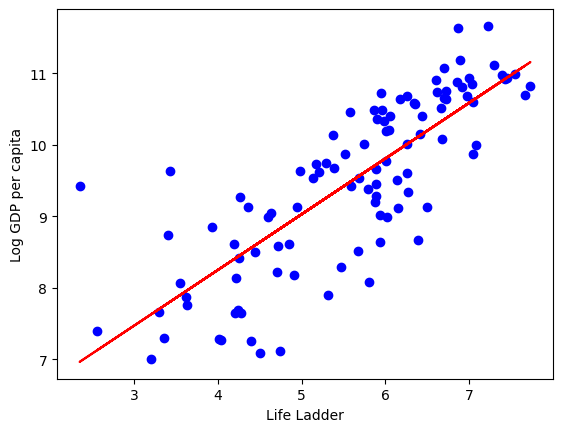

In [60]:
#corrélation entre le niveau de vie et le pib dans le monde en 2022
df1=df[df['year'] == 2022]
df1.set_index('Country name',inplace = True)
df2 = df1[['Life Ladder','Log GDP per capita']]
nuage_pt_tous_pays(df2)

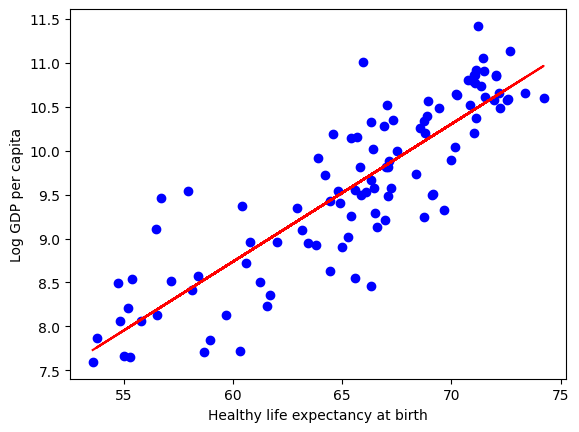

In [61]:
#corrélation entre l'espérance de vie et le pib dans le monde en 2020
df3=df[df['year'] == 2020]
df3.set_index('Country name',inplace = True)
df4 = df3[['Healthy life expectancy at birth','Log GDP per capita']]
nuage_pt_tous_pays(df4)

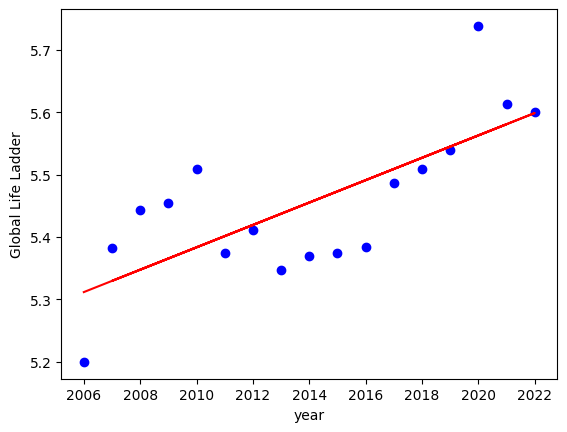

In [70]:
#image de l'évolution du niveau de vie global dans le monde
lst=df['year'].unique()
niveau_vie=[]
for annee in lst:
    niveau_vie.append(df['Life Ladder'][df['year']==annee].mean())
df5=pd.DataFrame(list(zip(lst,niveau_vie)),columns=['year','Global Life Ladder'])
df5 = df5[df5['year']!=2005]
nuage_pt_tous_pays(df5)


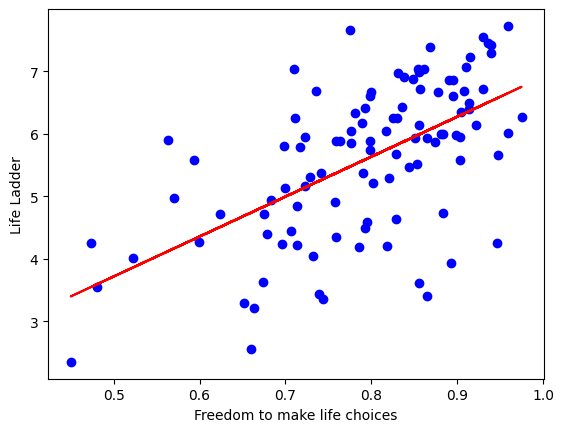

In [73]:
#corrélation entre la liberté de faire des choix et le niveau de vie dans le monde en 2022
df6=df[df['year'] == 2022]
df6.set_index('Country name',inplace = True)
df7 = df6[['Freedom to make life choices','Life Ladder']]
nuage_pt_tous_pays(df7)